# MERFISH Brain analysis

In [1]:
import scanpy as sc
import spacec as sp
import warnings
warnings.filterwarnings("ignore")

2025-04-14 10:44:12.389566: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
INFO:root: * TissUUmaps version: 3.1.1.6


In [2]:
data_dir = '/Users/yuqitan/Nolan Lab Dropbox/Yuqi Tan/analysis_pipeline/Manuscript/NatComm_091624/revision_031225/analysis/app_spatial_transcriptomics/'
output_dir = '/Users/yuqitan/Nolan Lab Dropbox/Yuqi Tan/analysis_pipeline/Manuscript/NatComm_091624/revision_031225/analysis/app_spatial_transcriptomics/output/'

In [3]:
# trying to read the imc
adata = sc.read(data_dir + 'merfish_adata.h5ad')
adata

AnnData object with n_obs × n_vars = 73655 × 161
    obs: 'Cell_ID', 'Animal_ID', 'Animal_sex', 'Behavior', 'Bregma', 'Centroid_X', 'Centroid_Y', 'Cell_class', 'Neuron_cluster_ID', 'batch'
    uns: 'Cell_class_colors'
    obsm: 'spatial', 'spatial3d'

In [24]:
adata.obs['z'] = [sublist[2] for sublist in adata.obsm['spatial3d']]
adata.obs['x'] = [sublist[0] for sublist in adata.obsm['spatial3d']]
adata.obs['y'] = [sublist[1] for sublist in adata.obsm['spatial3d']]

## Scatter plot

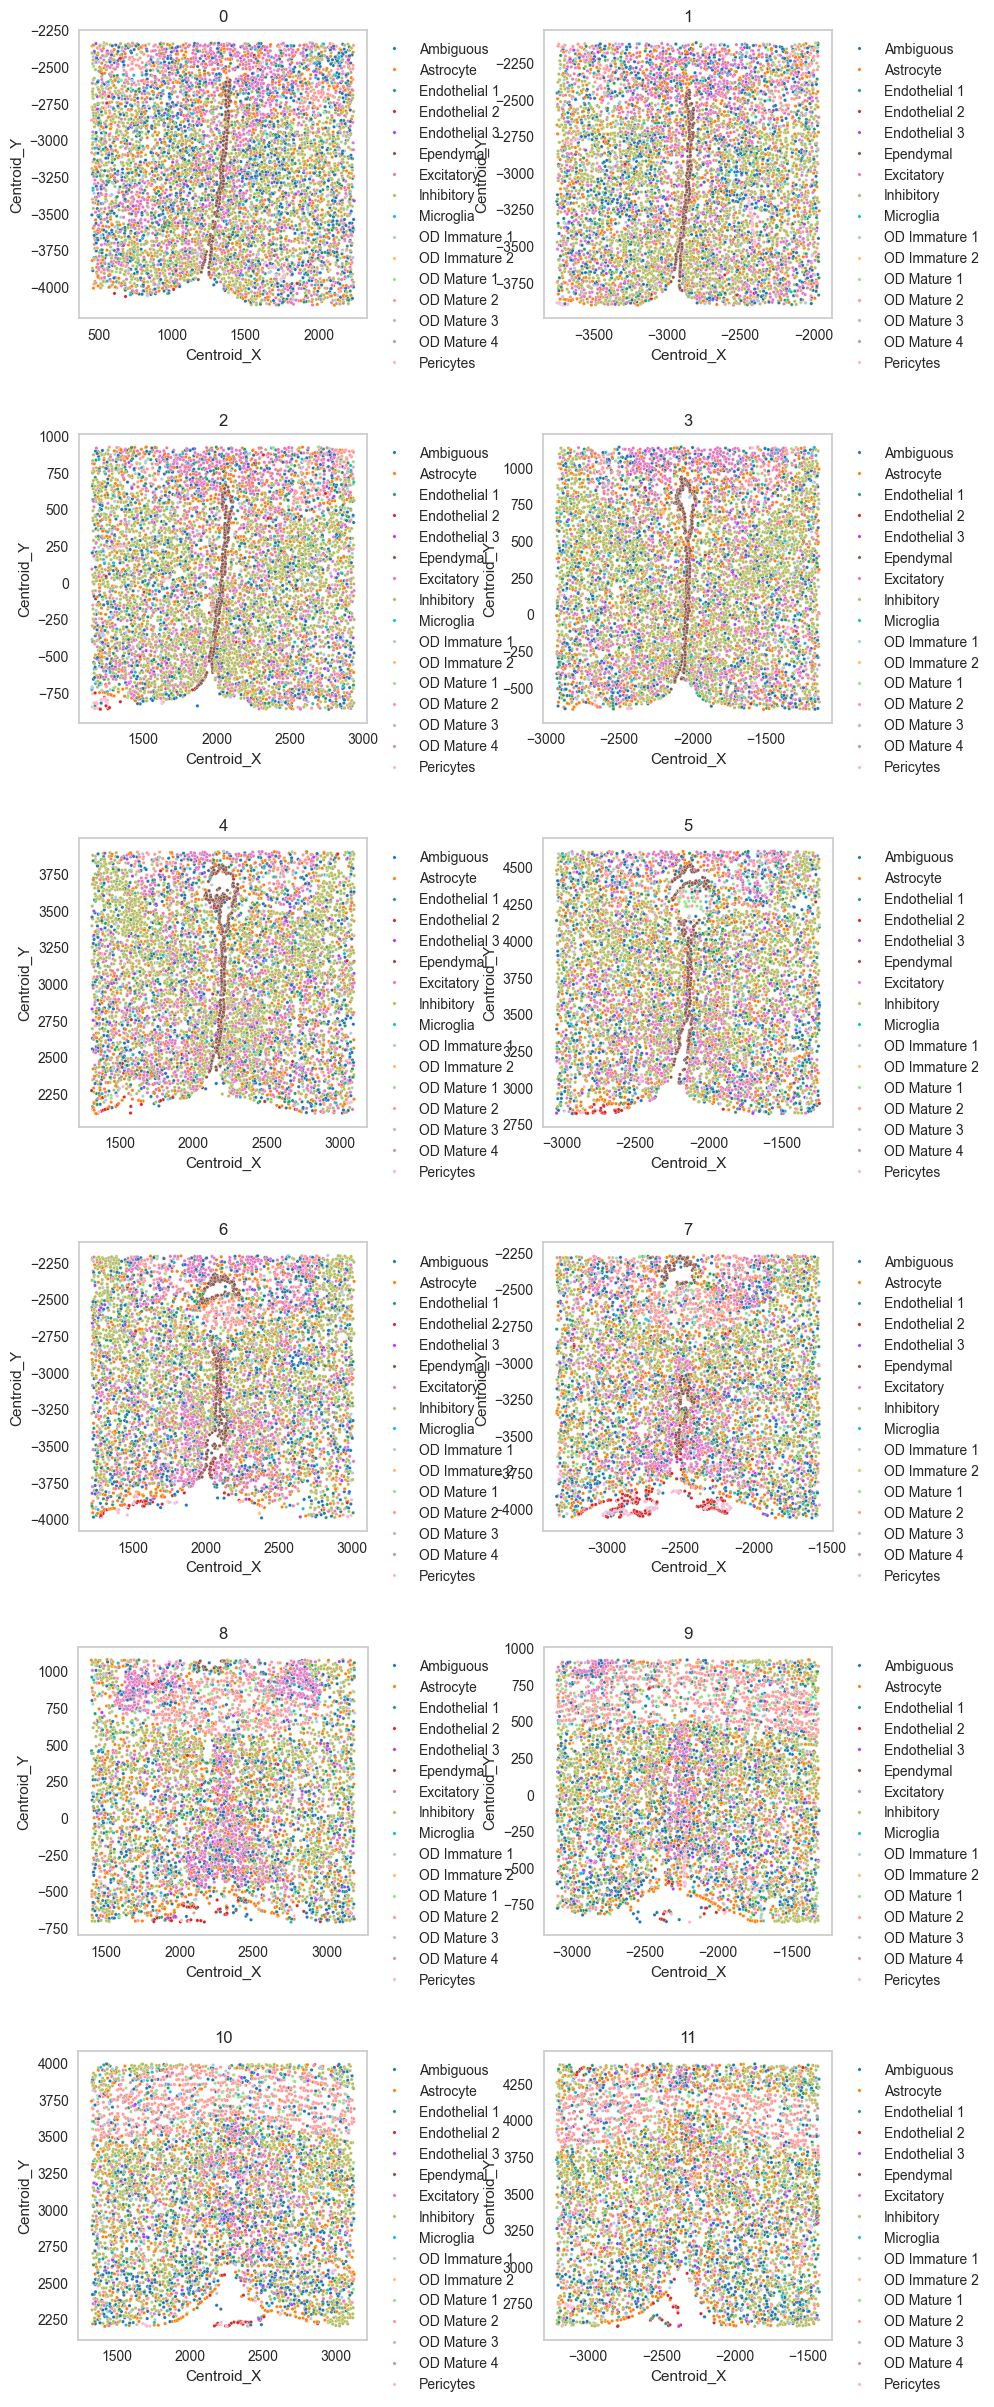

In [5]:
df = sp.pl.catplot(
    adata, 
    color = "Cell_class", # specify group column name here (e.g. celltype_fine)
    unique_region = "batch", # specify unique_regions here
    X='Centroid_X', Y='Centroid_Y', # specify x and y columns here
    n_columns=2, # adjust the number of columns for plotting here (how many plots do you want in one row?)
    palette=None, #default is None which means the color comes from the anndata.uns that matches the UMAP
    savefig=False, # save figure as pdf
    output_fname = "", # change it to file name you prefer when saving the figure
    output_dir= output_dir, # specify output directory here (if savefig=True)
)

## Cell type composition

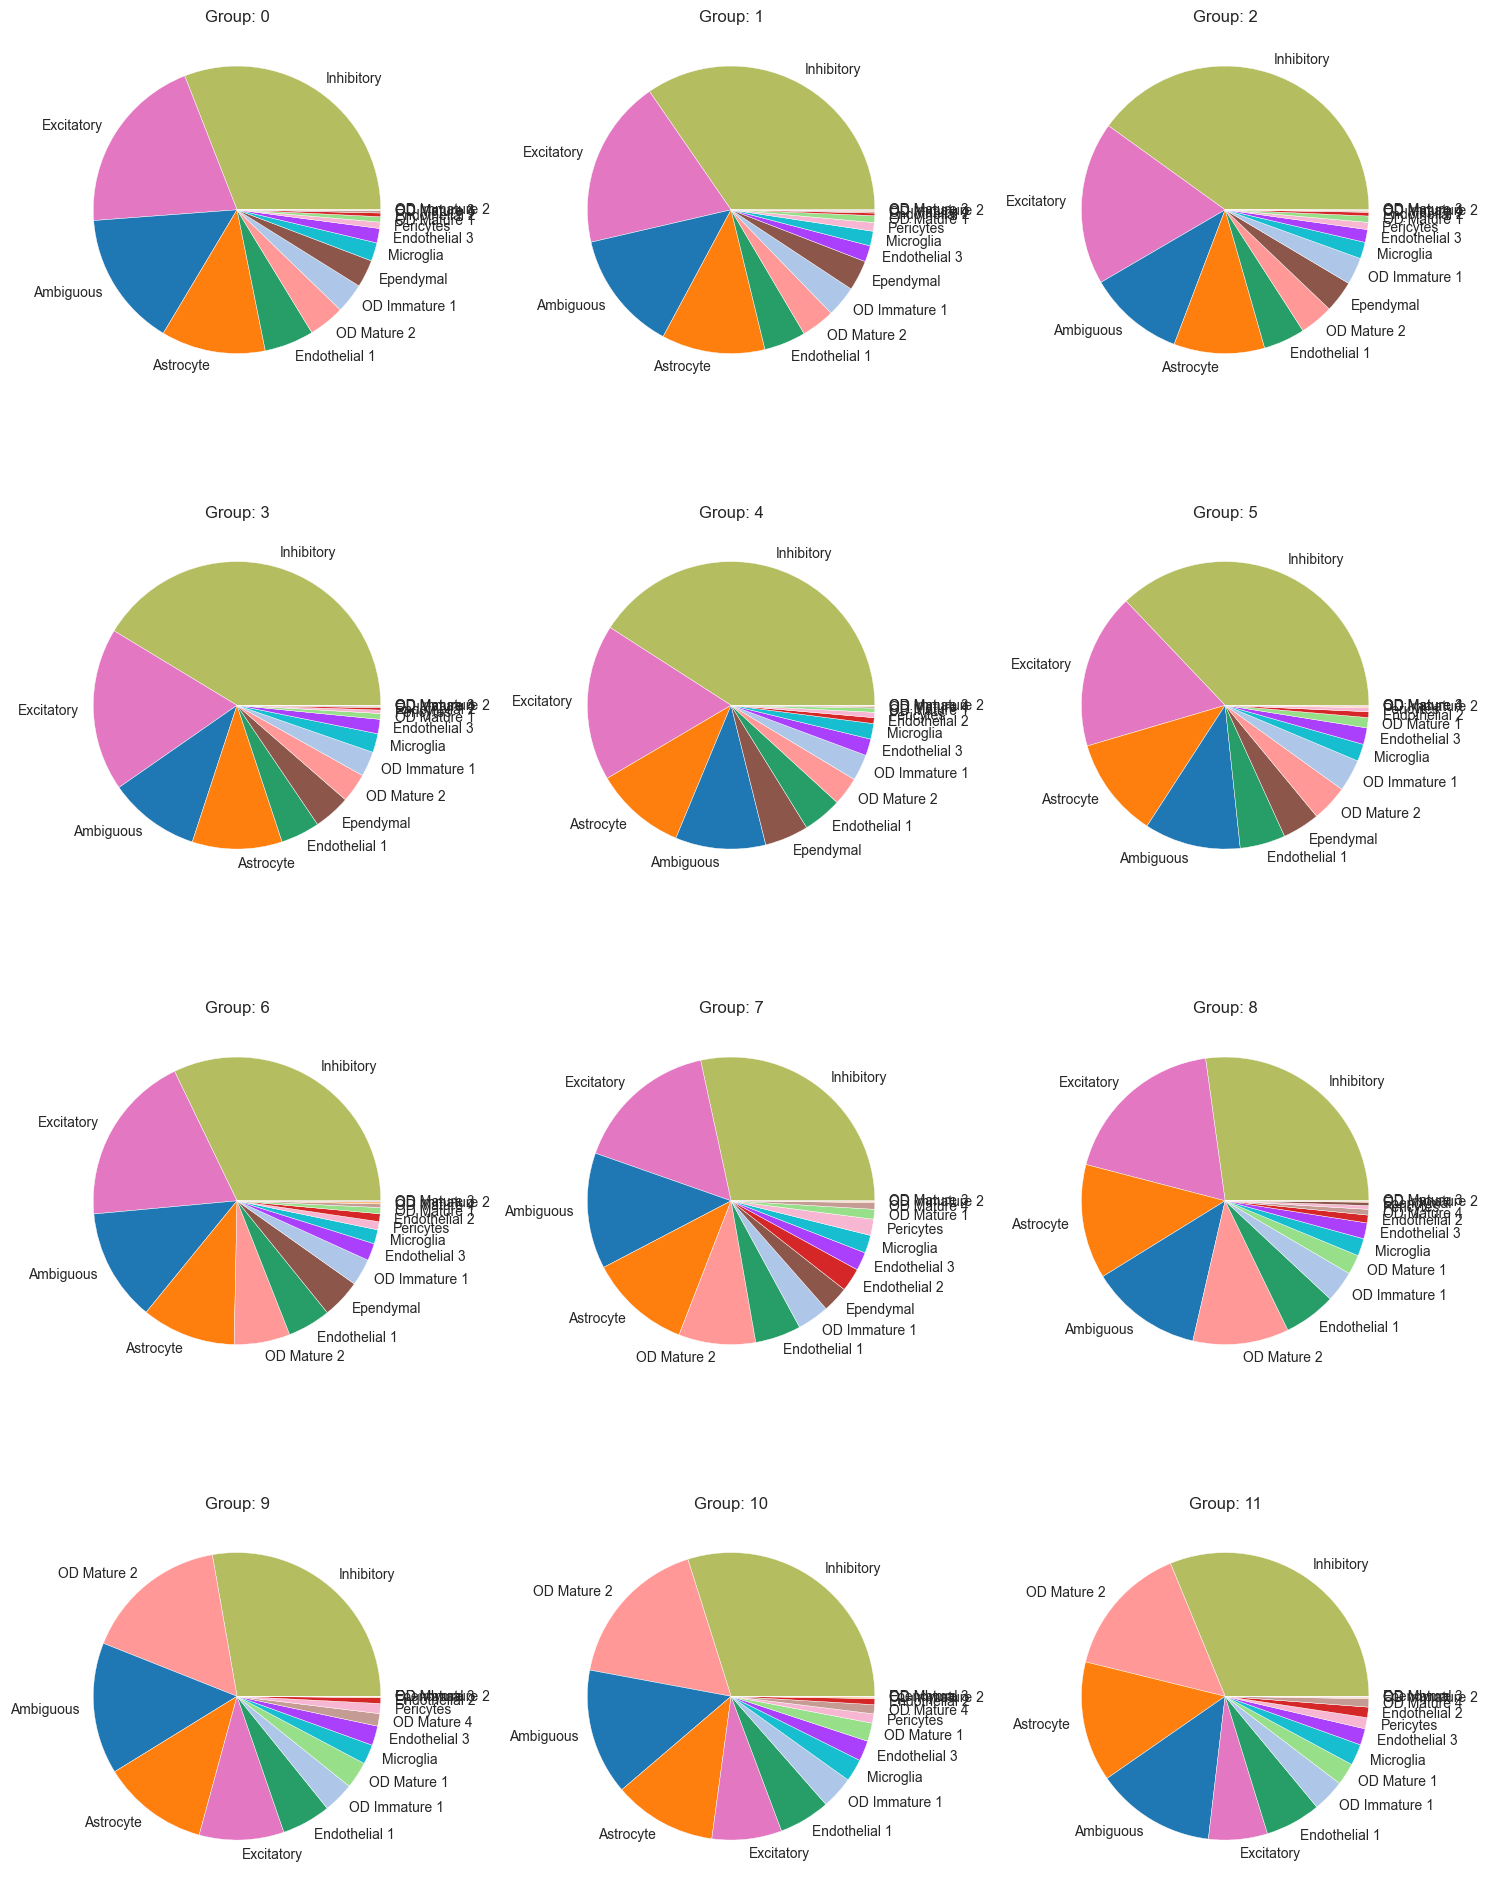

In [6]:
sp.pl.create_pie_charts(
    adata,
    color = "Cell_class", 
    grouping = "batch", 
    show_percentages=False,
    palette=None, #default is None which means the color comes from the anndata.uns that matches the UMAP
    savefig=False, # change it to true if you want to save the figure
    output_fname = "", # change it to file name you prefer when saving the figure
    output_dir = output_dir #output directory for the figure
)

## Neighborhood analysis

In [13]:
adata = sp.tl.neighborhood_analysis(
    adata, 
    unique_region = "batch", 
    cluster_col = "Cell_class", 
    X = 'Centroid_X', Y = 'Centroid_Y',
    k = 20, # k nearest neighbors
    n_neighborhoods = 6, #number of CNs
    elbow = False)

Starting: 1/12 : 0
Finishing: 1/12 : 0 0.026540040969848633 0.026935815811157227
Starting: 2/12 : 1
Finishing: 2/12 : 1 0.02335381507873535 0.05042695999145508
Starting: 11/12 : 10
Finishing: 11/12 : 10 0.018027067184448242 0.06853818893432617
Starting: 12/12 : 11
Finishing: 12/12 : 11 0.01808619499206543 0.08670425415039062
Starting: 3/12 : 2
Finishing: 3/12 : 2 0.02122187614440918 0.10800480842590332
Starting: 4/12 : 3
Finishing: 4/12 : 3 0.021470308303833008 0.12953495979309082
Starting: 5/12 : 4
Finishing: 5/12 : 4 0.020416975021362305 0.15001797676086426
Starting: 6/12 : 5
Finishing: 6/12 : 5 0.020200252532958984 0.17027020454406738
Starting: 7/12 : 6
Finishing: 7/12 : 6 0.019760847091674805 0.19010400772094727
Starting: 8/12 : 7
Finishing: 8/12 : 7 0.021451950073242188 0.21161913871765137
Starting: 9/12 : 8
Finishing: 9/12 : 8 0.04514718055725098 0.2572300434112549
Starting: 10/12 : 9
Finishing: 10/12 : 9 0.020075082778930664 0.27739500999450684


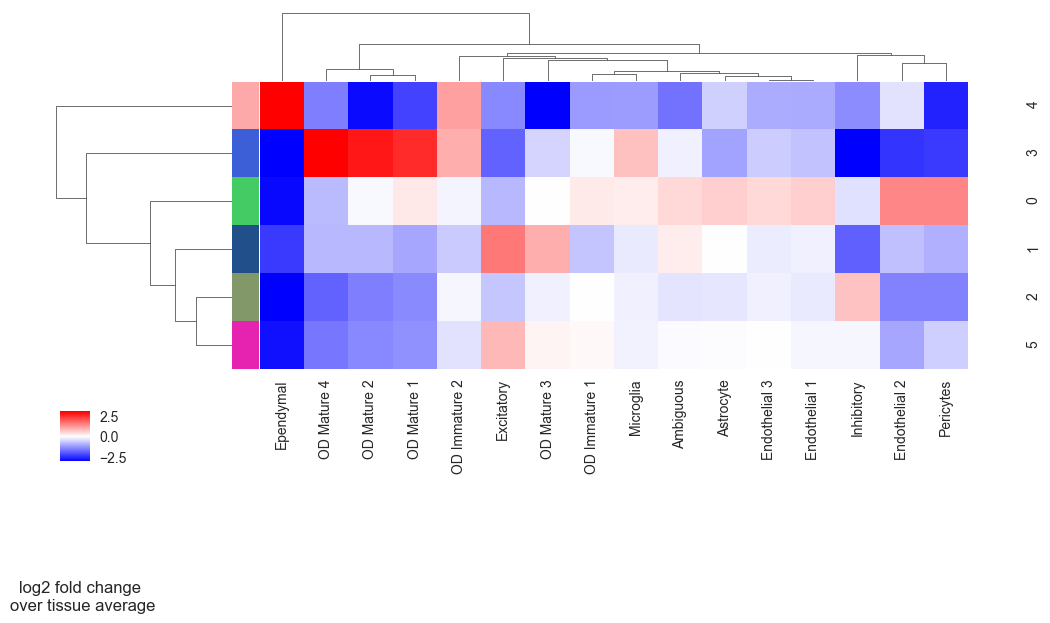

In [14]:
sp.pl.cn_exp_heatmap(
    adata, # anndata
    cluster_col = "Cell_class", # cell type column
    cn_col = "CN_k20_n6", # CN column
    palette=None, # color palette for CN
    savefig = False, # save the figure
    output_dir = output_dir, # output directory
    rand_seed = 1 # random seed for reproducibility
)

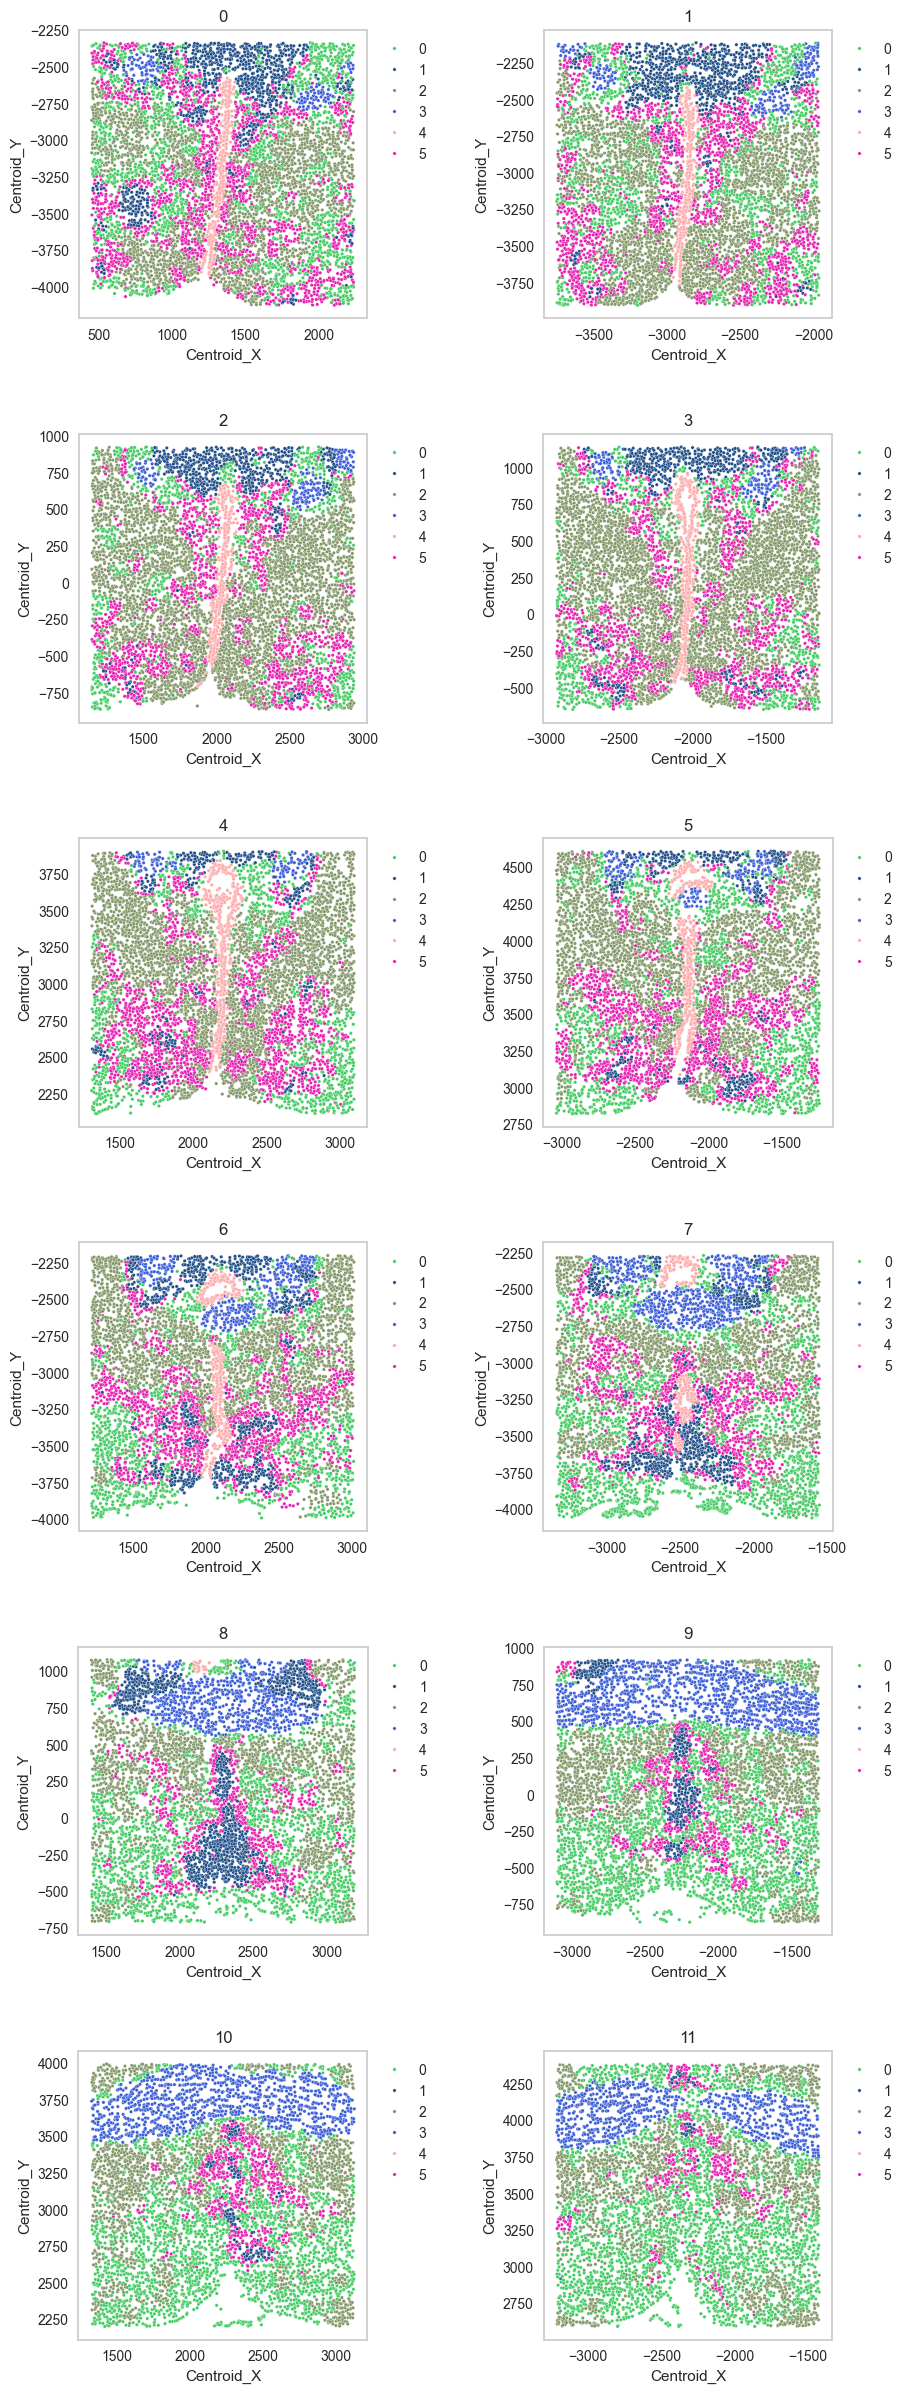

In [16]:
df = sp.pl.catplot(
    adata, 
    color = "CN_k20_n6", # specify group column name here (e.g. celltype_fine)
    unique_region = "batch", # specify unique_regions here
    X='Centroid_X', Y='Centroid_Y', # specify x and y columns here
    n_columns=2, # adjust the number of columns for plotting here (how many plots do you want in one row?)
    palette=None, #default is None which means the color comes from the anndata.uns that matches the UMAP
    savefig=False, # save figure as pdf
    output_fname = "", # change it to file name you prefer when saving the figure
    output_dir= output_dir, # specify output directory here (if savefig=True)
)

## Spatial context map

Starting: 1/12 : 0
Finishing: 1/12 : 0 0.06926202774047852 0.06980204582214355
Starting: 2/12 : 1
Finishing: 2/12 : 1 0.05220293998718262 0.12255597114562988
Starting: 3/12 : 2
Finishing: 3/12 : 2 0.06012892723083496 0.18282604217529297
Starting: 4/12 : 3
Finishing: 4/12 : 3 0.05655407905578613 0.23950695991516113
Starting: 5/12 : 4
Finishing: 5/12 : 4 0.052865028381347656 0.29278111457824707
Starting: 6/12 : 5
Finishing: 6/12 : 5 0.049626827239990234 0.34260988235473633
Starting: 7/12 : 6
Finishing: 7/12 : 6 0.050742149353027344 0.3934810161590576
Starting: 8/12 : 7
Finishing: 8/12 : 7 0.0501101016998291 0.4437241554260254
Starting: 9/12 : 8
Finishing: 9/12 : 8 0.0455317497253418 0.48973798751831055
Starting: 10/12 : 9
Finishing: 10/12 : 9 0.048619985580444336 0.5384666919708252
Starting: 11/12 : 10
Finishing: 11/12 : 10 0.043827056884765625 0.5824260711669922
Starting: 12/12 : 11
Finishing: 12/12 : 11 0.04308009147644043 0.6256120204925537
13 0.016183558482112503


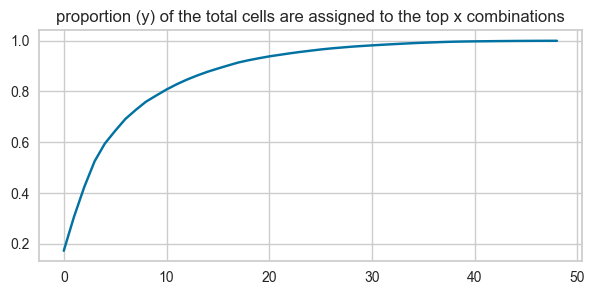

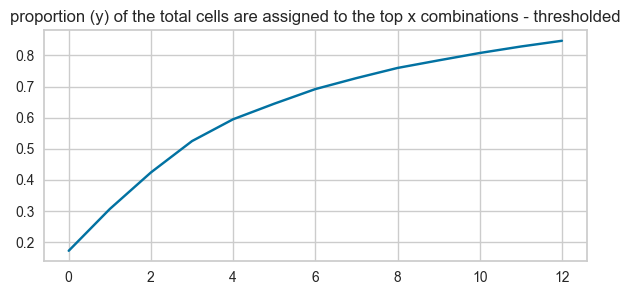

In [17]:
cnmap_dict_merfish = sp.tl.build_cn_map(
    adata = adata, # adata object
    cn_col = "CN_k20_n6",# column with CNs
    palette = None, # color dictionary
    unique_region = 'batch',# column with unique regions
    k = 70, # number of neighbors
    X='Centroid_X', Y='Centroid_Y',  # coordinates
    threshold = 0.85, # threshold for percentage of cells in CN
    per_keep_thres = 0.85,) # threshold for percentage of cells in CN

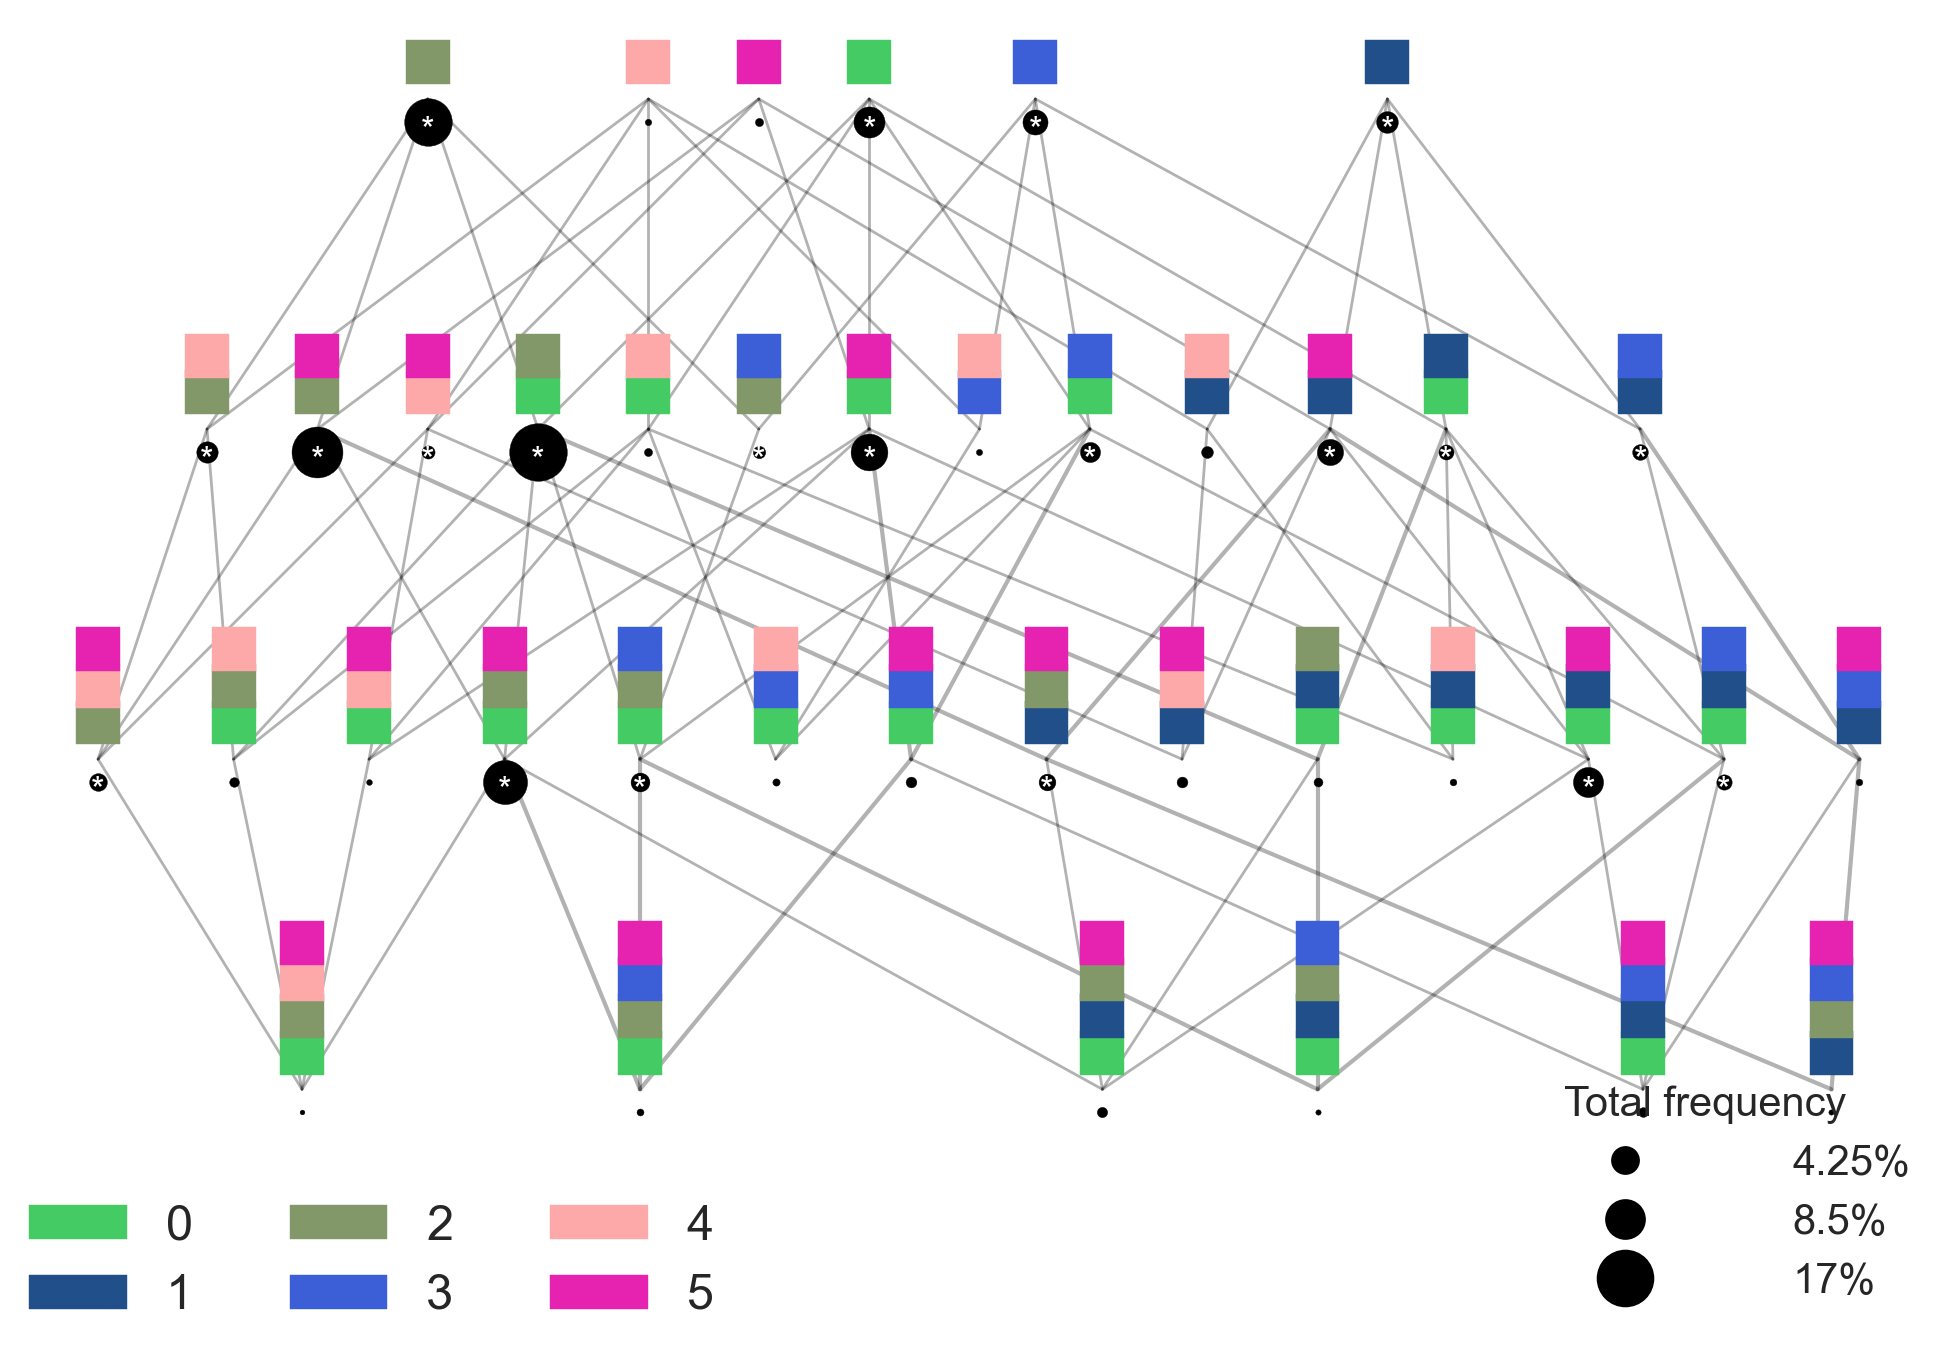

In [18]:
sp.pl.cn_map(cnmap_dict = cnmap_dict_merfish, # dictionary from the previous step
        adata = adata, # adata object
        cn_col = "CN_k20_n6", # column with CNs used to color the plot
        palette = None, # color dictionary
        figsize=(25, 15), # figure size
        savefig=False, # save figure as pdf
        output_fname = "", # change it to file name you prefer when saving the figure
        output_dir= output_dir # specify output directory here (if savefig=True)
    )

## Barycentric coordinate plots

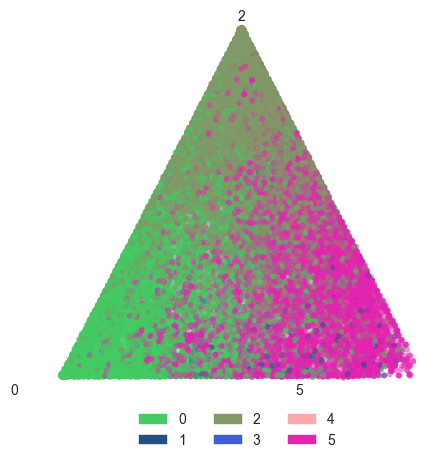

In [20]:
sp.pl.BC_projection(adata=adata,
    cnmap_dict = cnmap_dict_merfish, # dictionary from the previous step
    cn_col = "CN_k20_n6", # column with CNs
    plot_list = [0, 2, 5], # list of CNs to plot (three for the corners)
    cn_col_annt = "CN_k20_n6", # column with CNs used to color the plot
    palette = None, # color dictionary
    figsize=(5, 5), # figure size
    rand_seed = 1, # random seed for reproducibility
    n_num = None, # number of neighbors
    threshold = 0.6) # threshold for percentage of cells in CN